Durante la práctica hemos incluido la primera hidden layer de 32 neuronas para **dar el efecto de dar profundidad a nuestra red** creando ya un *multilayer perceptron*. Para ello hemos definido las variables ```(W1, B1)``` y ```(W2, B2)```  y re-calculaado  las predicciones como $\hat{Y} = softmax(Y1*W2 + B2)$ siendo $Y1 = FA(X*W1+ B1)$, siendo FA la función de activación(aunque todo esto lo ha hecho keras por nosotros)

Hay que tener en cuenta que conforme le damos profundidad a la red es importante inicializar los pesos (```W1``` y ```W2``` en nuestro caso) con **valores aleatorios siguiendo una distribución gaussiana**. De otra forma, el optimizador puede quedarse atascado en la posición inicial y no ser capaz de moverse en la dirección del mínimo de la función de pérdidas. 

A partir de dos capas ocultas en adelante es cuando podemos hablar de **redes neuronales profundas**. Ahora vamos a darle más profundidad a nuestra red poniendo cuatro capas ocultas, nuestra deep net estará compuesta por la entrada, cuatro capas ocultas con 200, 100, 60 y 30 neuronas, respectivamente y la capa de salida con las 10 neuronas.



In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Importamos el dataset MNIST desde Keras datasets y cargamos los datos #(X)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_te, y_te) = mnist.load_data()
# Normalizamos los datos en el rango de 0-1 para que computacionalmente sea más eficiente el proceso #(X)
x_train, x_te = x_train / 255.0, x_te / 255.0
# Pasamos a etiquetas one-hot encoded #(X)
y_train = to_categorical(y_train)
y_te = to_categorical(y_te)
# Dividimos el conjunto de training en training y validation #(X)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [ ]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_deep_net(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  
  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Flatten()) # Estiramos los datos en forma de vector como entrada 
  model.add(Dense(200, activation=activation_function)) 
  model.add(Dense(100, activation=activation_function)) 
  model.add(Dense(60, activation=activation_function)) 
  model.add(Dense(30, activation=activation_function)) 
  model.add(Dense(10, input_shape=(784,), activation="softmax")) 
  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate, decay=lr_decay/num_epochs), metrics=["accuracy"])  #(X)

  # Entrenando la solución
  H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)  #(X)
  model.summary()
  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x_te, batch_size=batch_size) 
  print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 3s 6ms/step - loss: 0.4841 - accuracy: 0.8521 - val_loss: 0.2039 - val_accuracy: 0.9373
Epoch 2/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1728 - accuracy: 0.9489 - val_loss: 0.1754 - val_accuracy: 0.9427
Epoch 3/50
422/422 [==============================] - 2s 5ms/step - loss: 0.1202 - accuracy: 0.9638 - val_loss: 0.1056 - val_accuracy: 0.9672
Epoch 4/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0908 - accuracy: 0.9726 - val_loss: 0.0877 - val_accuracy: 0.9720
Epoch 5/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0733 - accuracy: 0.9781 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 7/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0

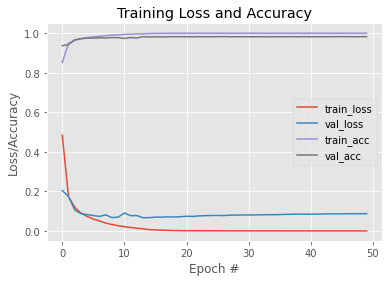

In [ ]:
activation_function = tf.nn.relu
learning_rate = 0.1
lr_decay = 1e-3
num_epochs = 50
batch_size = 128
train_deep_net(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

Que programandolo en tensorflow sería:

In [ ]:
'''def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer):
  # Creamos placeholders para ir almacenando los datos de entrada y los labels
  X = tf.placeholder(tf.float32, [None, 784]) #(X) # Imágenes del mnist: 28*28 = 784
  Y_true = tf.placeholder(tf.float32, [None, 10]) #(X) # Número indicando la clase 0-9 => 10 clases

  # Creamos e inicializamos las variables W y b con valores aleatorios que sigan una distribución normal
  W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1)) #(X)
  B1 = tf.Variable(tf.zeros([200])) #(X)
  W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1)) #(X)
  B2 = tf.Variable(tf.zeros([100])) #(X)
  W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1)) #(X)
  B3 = tf.Variable(tf.zeros([60])) #(X)
  W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1)) #(X)
  B4 = tf.Variable(tf.zeros([30])) #(X)
  W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1)) #(X)
  B5 = tf.Variable(tf.zeros([10])) #(X)

  # Calculamos las predicciones
  Y1 = act_function(tf.matmul(X,W1) + B1) #(X)
  Y2 = act_function(tf.matmul(Y1,W2) + B2) #(X)
  Y3 = act_function(tf.matmul(Y2,W3) + B3) #(X)
  Y4 = act_function(tf.matmul(Y3,W4) + B4) #(X)
  Y_logits = tf.matmul(Y4,W5) + B5 
  Y_pred = tf.nn.softmax(Y_logits)

  # Definimos función de pérdidas (Cross_entropy)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y_logits, labels=Y_true)) 
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true * tf.log(Y_pred), reduction_indices=1)) #(X)
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true*tf.log(Y_pred), reduction_indices=1))

  # Optimizador SGD
  train = optimizer(lr).minimize(loss) #(X)

  # % de predicciones correctas en un determinado batch (i.e. accuracy)
  is_correct = tf.equal(tf.argmax(Y_pred,1), tf.argmax(Y_true,1))
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
  # Inicializamos variables
  init = tf.initializers.global_variables() #(X)

  # Abrimos la sesión
  with tf.Session() as sess:
    sess.run(init) #(X)
    # Entrenamiento de nuestra red
    acc_epoch_tr = []
    acc_epoch_val = []
    loss_epoch_tr = []
    loss_epoch_val = []
    for epoch in range(n_epochs):
      avg_acc = 0.
      avg_loss = 0.
      steps = int(mnist.train.num_examples/batch_size) #(X) Calcular número de batches
      for i in range(steps):
        batch_X, batch_Y = mnist.train.next_batch(batch_size) #(X) # Pedir un nuevo batch del set de datos (emplear función next_batch)
        sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Entrenamos 
        a,l = sess.run([accuracy, loss], feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Calculamos accuracy y cross_entropy del batch
        avg_acc += a / steps #(X) Calcular el accuracy medio de los diferentes batches
        avg_loss += l / steps #(X) Calcular las pérdidas medias de los diferentes batches
      # Almacenamos el accuracy y las losses medios para cada época
      acc_epoch_tr.append(avg_acc) #(X)
      loss_epoch_tr.append(avg_loss) #(X)
      # Calculamos accuracy y losses en validation
      a_val, l_val = sess.run([accuracy, loss], feed_dict={X: mnist.validation.images, Y_true: mnist.validation.labels}) #(X)
      acc_epoch_val.append(a_val) #(X)
      loss_epoch_val.append(l_val) #(X)
      # Sacamos información por pantalla
      print("[INFO]: Época {} ---> Acc_train = {} - Loss_train = {} - Acc_val = {} - Loss_val = {}".format(epoch, avg_acc, avg_loss, a_val, l_val)) #(X)

    # Cálculo de accuracy y losses en el conjunto de test
    a_test, l_test = sess.run([accuracy, loss], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels}) #(X)
    print("[INFO]: Accuracy en test = {} - Losses en test = {}".format(a_test, l_test)) #(X)

    # Gráficar losses por época
    plt.plot(np.arange(0, n_epochs), loss_epoch_tr) #(X)
    plt.plot(np.arange(0, n_epochs), loss_epoch_val)
    plt.legend(['train', 'val'], loc='upper left')
    plt.title('Training Loss') #(X)
    plt.xlabel('Epoch #') #(X)
    plt.ylabel('Loss') #(X)
    
b_size = 128
n_epochs = 50
lr = 0.005
act_function = tf.nn.relu
optimizer = tf.train.GradientDescentOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer)'''